# Drop Out Prediction


***The puspose of this project is to identify a student whether he/she has any tendency to being a drop out .There are 2 class reluler & dropout .The aim is to predict those drop out(true positive) classes.***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.learning_curve import learning_curve

In [3]:
data =pd.read_csv('./cleanData.csv')
backUp=data.copy(deep=True)

In [4]:
data.head()


,new_id,batch,sex,ssctotal,sscyear,hsctotal,hscyear,dif_ssc_hsc,dif_hsc_uni,drop_out,...,semester12_cgpa,semester12_fail,semester13_cgpa,semester13_fail,semester14_cgpa,semester14_fail,semester15_cgpa,semester15_fail,semester16_cgpa,semester16_fail
0,3,20120,male,4.14,2009.0,4.28,2011.0,0,1,reguler,...,2.393478,2,2.462185,2,2.561024,0,2.576087,0,2.576087,0
1,4,20090,male,4.50,2006.0,3.80,2008.0,0,1,dropOut,...,1.723214,0,1.723214,0,1.723214,0,1.723214,0,1.723214,0
2,6,20160,female,4.63,2013.0,3.83,2015.0,0,1,reguler,...,2.297872,0,2.297872,0,2.297872,0,2.297872,0,2.297872,0
3,7,20162,male,5.00,2009.0,5.00,2011.0,0,5,reguler,...,3.363636,0,3.363636,0,3.363636,0,3.363636,0,3.363636,0
4,10,20161,male,5.00,2012.0,4.10,2014.0,0,2,dropOut,...,1.350000,0,1.350000,0,1.350000,0,1.350000,0,1.350000,0


In [5]:
data.shape

(1931, 42)

In [6]:
data.isnull().any().any()

False

In [7]:
print(data.columns)

Index(['new_id', 'batch', 'sex', 'ssctotal', 'sscyear', 'hsctotal', 'hscyear',
       'dif_ssc_hsc', 'dif_hsc_uni', 'drop_out', 'semester1_cgpa',
       'semester1_fail', 'semester2_cgpa', 'semester2_fail', 'semester3_cgpa',
       'semester3_fail', 'semester4_cgpa', 'semester4_fail', 'semester5_cgpa',
       'semester5_fail', 'semester6_cgpa', 'semester6_fail', 'semester7_cgpa',
       'semester7_fail', 'semester8_cgpa', 'semester8_fail', 'semester9_cgpa',
       'semester9_fail', 'semester10_cgpa', 'semester10_fail',
       'semester11_cgpa', 'semester11_fail', 'semester12_cgpa',
       'semester12_fail', 'semester13_cgpa', 'semester13_fail',
       'semester14_cgpa', 'semester14_fail', 'semester15_cgpa',
       'semester15_fail', 'semester16_cgpa', 'semester16_fail'],
      dtype='object')


In [8]:
Class=data['drop_out'].copy(deep=True)
data['sex'] = (data['sex']=='male')*1

In [9]:
data=data.drop(['new_id', 'batch','sscyear','hscyear','drop_out'],axis=1)


In [10]:
data.shape

(1931, 37)

Counter({'reguler': 1534, 'dropOut': 397})


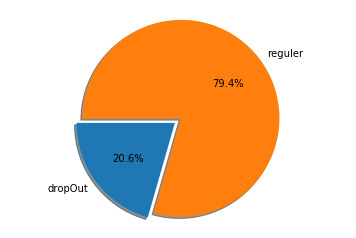

In [11]:
x=Counter(Class)
print(x)
lab=x.keys()
val=x.values()
exp=[0,0.08]

fig1, ax1 = plt.subplots()
ax1.pie(val, explode=exp, labels=lab, autopct='%1.1f%%',shadow=True, startangle=180)
ax1.axis('equal') 
plt.show()

**From the pie chart it's clear that it's a imbalanced dataset with 4:1 ratio . So we want to do resampling the data set.As it's a small dataset so we want to do over-sampling the minority class by using SMOTE or the Synthetic Minority Over-sampling Technique.**

In [17]:
sm=SMOTE(ratio='minority',random_state=1,k_neighbors=8,m_neighbors=18)
data_sm,Class_sm = sm.fit_sample(data,Class)
print(Counter(Class_sm))

Counter({'dropOut': 1534, 'reguler': 1534})


In [13]:

X_train, X_test, y_train, y_test = train_test_split(data_sm,Class_sm, test_size=0.33, random_state=324)

In [14]:
def Learning_curve(model,name):

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, 
                        n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(name)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.ylim(-.1,1.1)
    plt.show()

    #plot_curve()

**Here our y-axis is 'score', not 'error', so the higher the score, the better the performance of the model.**

**High Bias**

Training score (red line) decreases and plateau
   * Indicates underfitting
   * High bias
   
Cross-validation score (green line) stagnating throughout
   * Unable to learn from data
   
Low scores (high errors)

    
**High Variance**

Training score (red line) is at its maximum regardless of training examples
   * Indicates overfitting
   
Huge gap between cross-validation score and training score 
   * Indicates high variance scenario(overfitting)
 

# KN-Neighbors

([<matplotlib.axis.XTick at 0x7f33890b0128>,
 <a list of 5 Text xticklabel objects>)

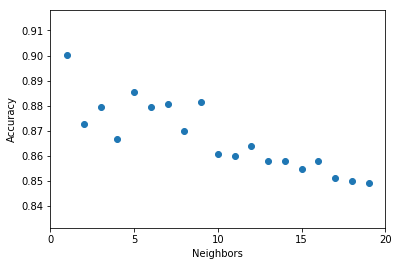

In [209]:
k_range = range(1, 20)
scores = []
best_score=0
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k,algorithm='auto',n_jobs=-1)
    tmp_model=knn_model.fit(X_train, y_train)
    tmp=knn_model.score(X_test, y_test)
    if best_score<tmp:
        best_score=tmp
        best_model=tmp_model
    scores.append(tmp)
plt.figure()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [131]:
print('Accuracy: %.2f'%((best_score*100)))

Accuracy: 90.03


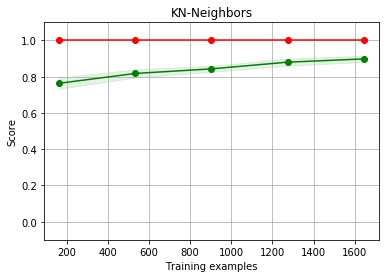

In [211]:
Learning_curve(best_model,'KN-Neighbors')

**As we can see the training score (red line) is at its maximum regardless of training examples which Indicates overfitting.**

In [132]:
predictions =best_model.predict(X_test)
print(pd.crosstab(y_test, predictions, colnames=['Predicted'],rownames=['Actual'],margins=True))

Predicted  dropOut  reguler   All
Actual                           
dropOut        487       20   507
reguler         81      425   506
All            568      445  1013


In [133]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

    dropOut       0.96      0.86      0.91       568
    reguler       0.84      0.96      0.89       445

avg / total       0.91      0.90      0.90      1013



# Decision Tree

In [21]:
parameters={"max_depth": [10,11,12,13,14]
            ,"min_samples_split" :[4,5,6,7,8]
            ,"min_samples_leaf": [16,17,18]
            ,"max_features": (4,5,6,"sqrt","auto")
            ,"criterion": ('gini','entropy')}


classifier = DecisionTreeClassifier(random_state=5)
dt_model= GridSearchCV(estimator=classifier,param_grid=parameters,cv=5)  
dt_model.fit(X_train, y_train)
print('Accuracy: %.2f'%((model.score(X_test,y_test)*100)))

NameError: name 'model' is not defined

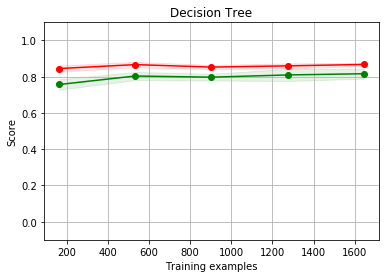

In [16]:
Learning_curve(dt_model,'Decision Tree')

In [18]:
dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 6,
 'min_samples_leaf': 17,
 'min_samples_split': 4}

In [19]:
predictions =dt_model.predict(X_test)
print(pd.crosstab(y_test, predictions, colnames=['Predicted'],rownames=['Actual'],margins=True))

Predicted  dropOut  reguler   All
Actual                           
dropOut        431       76   507
reguler         75      431   506
All            506      507  1013


In [20]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

    dropOut       0.85      0.85      0.85       506
    reguler       0.85      0.85      0.85       507

avg / total       0.85      0.85      0.85      1013



**From the classification report we find that the precision of drop out and reguler are both 85%, and the learning curve neither showing overfitting nor underfitting**

# Random Forest

In [217]:
parameters={"max_depth": [10,11,12,13,14,15]
            ,"min_samples_split" :[2,3,4,5,6]
            ,"min_samples_leaf": [16,17,18]
            ,"n_estimators" : [25]
            ,"max_features": (4,5,6,"sqrt","auto")
            ,"criterion": ('gini','entropy')}

classifier = RandomForestClassifier( n_jobs=-1,random_state=5,oob_score =True)

rf_model= GridSearchCV(estimator=classifier,param_grid=parameters,cv=5)  
rf_model.fit(X_train, y_train)
print('Accuracy: %.2f'%((model.score(X_test,y_test)*100)))

Accuracy: 91.51


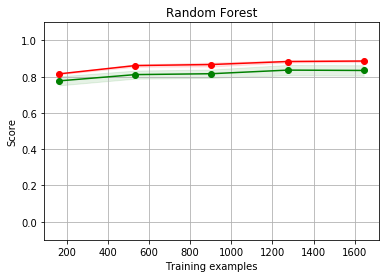

In [220]:
Learning_curve(rf_model,'Random Forest')

In [227]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 5,
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'n_estimators': 25}

In [224]:
predictions =rf_model.predict(X_test)
print(pd.crosstab(y_test, predictions, colnames=['Predicted'],rownames=['Actual'],margins=True))

Predicted  dropOut  reguler   All
Actual                           
dropOut        419       88   507
reguler         47      459   506
All            466      547  1013


In [225]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

    dropOut       0.83      0.90      0.86       466
    reguler       0.91      0.84      0.87       547

avg / total       0.87      0.87      0.87      1013



**From the classification report we find that the precision of drop out is 83% and reguler is 91%, and the learning curve neither showing overfitting nor underfitting**






***From the avobe three models KNN classifier will make more accurate true positive predictions in the sample data, but the model may not generalize well in the real world .Decision Tree & Random Forest both are showing good result . As decision tree is showing more acuracy (in term of drop out precision) than random forest ,Decision Tree would be best choice for this  problem .***